In [92]:
# using plotmaker on v3

import scanpy as sc
import anndata as ad
import pandas as pd
from scipy.sparse import csr_matrix, vstack
import random
import numpy as np
import random
from scipy.io import mmread, mmwrite
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
import igraph
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
adata = ad.read_h5ad('D:/newgenes/data/scanorama_full_leiden_v3.h5ad')

In [101]:
adata.obs

,Exon_reads,Intron_reads,All_reads,RT_group,Organ,Fetus_id,Development_day,Sex,Batch,Main_cluster_umap_1,...,k15_assignment,day,Sample,sex,group,dataset,annot,leiden,BDRL_Sample_ID,age
exp5-human-713well.GGCGCATTTTTACGTATAC,119.0,448.0,704.0,Cerebellum_H27471,Cerebellum,H27471,110.0,F,4.0,1.375674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,110.0
exp5-human-557well.TAAGAATGGTGTCCTACTTG,524.0,287.0,950.0,Cerebellum_H27472,Cerebellum,H27472,94.0,F,2.0,0.382559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,94.0
exp5-human-770well.AGAGTACCTAGACTCAAGC,446.0,966.0,1716.0,Cerebellum_H27471,Cerebellum,H27471,110.0,F,4.0,0.212030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,110.0
exp1-human-431.CCGTCGATTGAAGGTTGCC,183.0,482.0,796.0,Cerebellum_H27634,Cerebellum,H27634,115.0,M,10.0,0.366306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,115.0
exp1-human-561.GGTACCATTTTGCGAGGCA,324.0,431.0,886.0,Cerebellum_H27472,Cerebellum,H27472,94.0,F,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_G12_P3-E02_LIG34_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.0,H27874,M,cntrl,male_brain_003,82 M H27874,0,NaN,82.0
H12_G12_P3-E03_LIG22_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.0,H27874,M,cntrl,male_brain_003,82 M H27874,12,NaN,82.0
H12_G12_P3-E03_LIG265_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.0,H27874,M,cntrl,male_brain_003,82 M H27874,43,NaN,82.0
H12_G12_P3-E03_LIG30_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,82.0,H27874,M,cntrl,male_brain_003,82 M H27874,0,NaN,82.0


In [95]:
# changes var from ensembl to gene_short_name - used in the marker gene dotplot
adata.var["ensembl"] = adata.var.index.values

In [96]:
# changes var from ensembl to gene_short_name - used in the marker gene dotplot
adata.var.index = adata.var["gene_short_name"].values.astype(str)
adata.var_names_make_unique()

In [97]:
adata.var

,gene_short_name,ensembl
TSPAN6,TSPAN6,ENSG00000000003
TNMD,TNMD,ENSG00000000005
DPM1,DPM1,ENSG00000000419
SCYL3,SCYL3,ENSG00000000457
C1orf112,C1orf112,ENSG00000000460
...,...,...
AC096992.2,AC096992.2,ENSG00000273486
AC104836.1,AC104836.1,ENSG00000273487
AC008264.2,AC008264.2,ENSG00000273489
AP000229.1,AP000229.1,ENSG00000273492


In [98]:
adata.obs["leiden"] = adata.obs["leiden"].astype(int) 
adata_dis = adata[adata.obs["origin"] == "Disteche"]
adata_ian = adata[adata.obs["origin"] == "Ian"]
adata_cao = adata[adata.obs["origin"] == "Cao"]
cao_obs = adata_cao.obs
# Step 1: Group by 'leiden' and 'Main_cluster_name', and count rows
counts = cao_obs.groupby(['leiden', 'Main_cluster_name']).size().reset_index(name='count')
counts["leiden"] = counts["leiden"].astype(int)
# Step 2: Calculate total counts per leiden value
total_counts = cao_obs.groupby('leiden').size()

# Step 3: Compute percentages
counts['total_rows'] = counts['leiden'].map(total_counts)  # Map total counts to each row
counts['percentage'] = (counts['count'] / counts['total_rows']) * 100
# Step 1: Find the most common Main_cluster_name for each leiden
most_common = cao_obs.groupby('leiden')['Main_cluster_name'].agg(lambda x: x.mode()[0]).reset_index(name='most_common')

# Step 2: Calculate total counts per leiden value
total_counts = cao_obs.groupby('leiden').size()

# Step 3: Compute percentages correctly
most_common['total_rows'] = most_common['leiden'].map(total_counts)  # Map total counts to each row

# Display the result
most_common = most_common.sort_values(by='most_common')

# Get a list of the values in the "leiden" column in the new order
cluster_order = most_common['leiden'].tolist()
most_common_list = most_common["most_common"].tolist()
cluster_len = len(cluster_order)

adata_dis.obs["leiden"] = adata_dis.obs["leiden"].astype(int).astype("category")
adata_ian.obs["leiden"] = adata_ian.obs["leiden"].astype(int).astype("category")
adata_cao.obs["leiden"] = adata_cao.obs["leiden"].astype(int).astype("category")

adata_dis.obs['leiden'] = adata_dis.obs['leiden'].cat.set_categories(cluster_order)
adata_ian.obs['leiden'] = adata_ian.obs['leiden'].cat.set_categories(cluster_order)
adata_cao.obs['leiden'] = adata_cao.obs['leiden'].cat.set_categories(cluster_order)

# Merge `most_common` with `counts` on ('leiden', 'most_common') using a left join
result = pd.merge(most_common, counts, left_on=['leiden', 'most_common'], right_on=['leiden', 'Main_cluster_name'], how='left')
result.drop("Main_cluster_name", axis=1, inplace=True)
result.drop("total_rows_y", axis=1, inplace=True)

# Rename column 'A' to 'new_column_name'
result.rename(columns={'total_rows_x': 'total_cells'}, inplace=True)

c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\2207328177.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = cao_obs.groupby(['leiden', 'Main_cluster_name']).size().reset_index(name='count')
C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\2207328177.py:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_dis.obs["leiden"] = adata_dis.obs["leiden"].astype(int).astype("category")
C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\220732817

C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\4069654265.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  odds_r = (a / c) / (b / d)


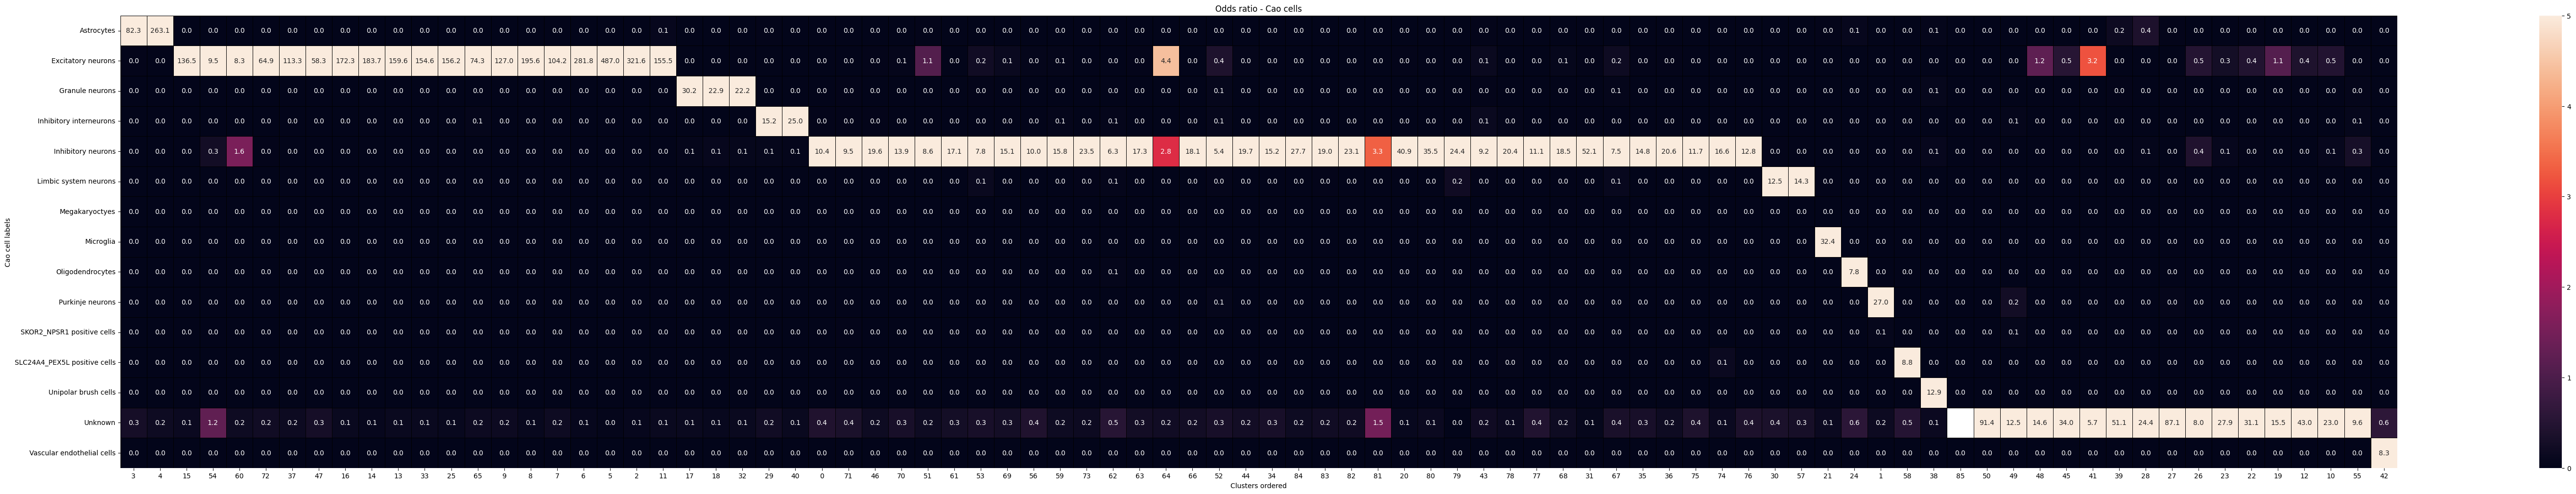

In [99]:
# Makes the odds ratio heatmap

# Create a pivot table
pivot_table = counts.pivot_table(index='Main_cluster_name', columns='leiden', values='count', fill_value=0)
pivot_table_ordered = pivot_table.reindex(columns=cluster_order)


odds_ratio_vals = list()
for cluster in pivot_table_ordered:
    #print(cluster) # 4 
    counter = 0
    for cell in pivot_table_ordered[cluster]:
        #print(cell) # Braun cell classes
    #     #print(type(pivot_table[garnett]))
        a = cell # integer value 
        #print(a)
        b = pivot_table_ordered[cluster].sum() - cell # 7391
        #print(b)
        c = pivot_table_ordered.loc[most_common_list[counter]].sum() - cell
        d = 600000 - c - b - a
        counter = counter + 1
        odds_r = (a / c) / (b / d)
        odds_ratio_vals.append(odds_r)

# Reshape the list into a 2D numpy array with shape (11, 9)
reshaped_array = np.array(odds_ratio_vals).reshape(cluster_len, 15)

# Convert the 2D numpy array into a pandas DataFrame
odds_df = pd.DataFrame(reshaped_array)

labels = ["Astrocytes", "Excitatory neurons", "Granule neurons", "Inhibitory interneurons", "Inhibitory neurons", "Limbic system neurons", "Megakaryoctyes", "Microglia", "Oligodendrocytes", "Purkinje neurons", "SKOR2_NPSR1 positive cells", "SLC24A4_PEX5L positive cells", "Unipolar brush cells", "Unknown", "Vascular endothelial cells"]

odds_df_t = odds_df.T
odds_df_t.index = labels
odds_df_t.columns = cluster_order

q3 = odds_df_t.quantile(0.75)
# Plot heatmap
plt.figure(figsize=(75, 12))
sns.heatmap(odds_df_t, annot=True, fmt=".1f", vmax=5, linewidths=0.5, linecolor='black')
plt.title('Odds ratio - Cao cells')
plt.xlabel('Clusters ordered')
plt.ylabel('Cao cell labels')
#plt.savefig('/net/noble/vol1/home/es1/aneuploidy/data/for_scanorama/figures/odds_ratio_plot.png', dpi=200)
plt.show()


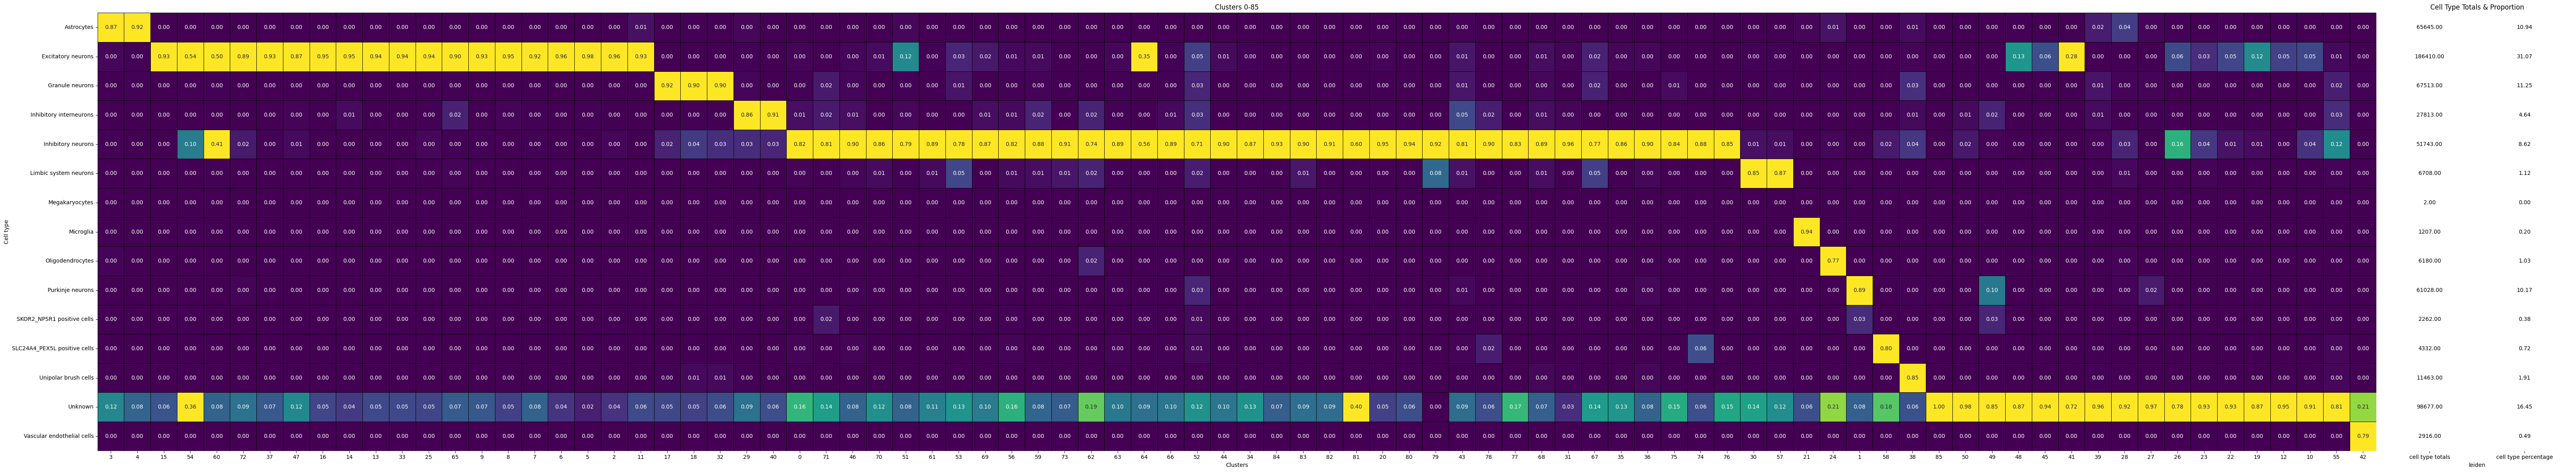

In [100]:
# makes cluster proportion heatmap

# Divide each cell by the row sum to get the proportion
pivot_table_ordered['cell type totals'] = pivot_table_ordered.iloc[:,:cluster_len].sum(axis=1)
pivot_table_ordered['cell type percentage'] = 100 * pivot_table_ordered['cell type totals'] / 600000


pivot_table_prop = pivot_table_ordered.copy()
for cluster in cluster_order:  # Assuming you have clusters numbered from 0 to 46
    pivot_table_prop[cluster] = pivot_table_prop[cluster] / pivot_table_prop[cluster].sum()

# Assuming your dataframe is named df
# Create figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(65, 12), gridspec_kw={'width_ratios': [12, 1]})

# Calculate the quartiles for the first heatmap
q1 = pivot_table_prop.iloc[:, :cluster_len].quantile(0.25).min()
q3 = pivot_table_prop.iloc[:, :cluster_len].quantile(0.75).max()

# First subplot: heatmap for columns 0 through 45
sns.heatmap(pivot_table_prop.iloc[:, :cluster_len], cmap='viridis', ax=axes[0], annot=True, cbar=False, fmt=".2f", vmin=0, vmax=0.25, linewidths=0.5, linecolor='black')
axes[0].set_title('Clusters 0-85')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('Cell type')



# Second subplot: heatmap for 'cell type totals' and 'cell type proportion'
sns.heatmap(pivot_table_prop[['cell type totals', 'cell type percentage']], cmap='viridis', ax=axes[1], annot=True, cbar=False, yticklabels=False, alpha = 0, fmt = ".2f")
for text in axes[1].texts:
    text.set_color('black')  # Set text color to white to make it transparent
axes[1].set_title('Cell Type Totals & Proportion')
axes[1].set_ylabel('')
#axes[1].set_aspect(10)
plt.tight_layout()
plt.show()

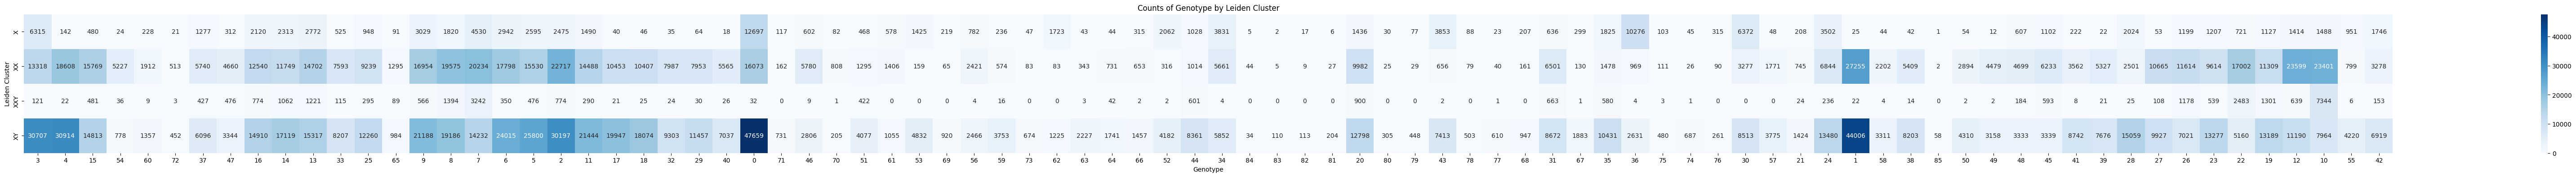

In [111]:
# Step 1: Create pivot table to aggregate counts
pivot_table = pd.pivot_table(
    adata.obs,
    values=None,
    index='genotype',
    columns='leiden',
    aggfunc='size',
    fill_value=0
)

pivot_table_ordered = pivot_table.reindex(columns=cluster_order)

# Step 2: Plot heatmap using seaborn
plt.figure(figsize=(85, 4))
sns.heatmap(pivot_table_ordered, annot=True, cmap='Blues', cbar=True, fmt='g')

# Add labels and title
plt.xlabel('Genotype')
plt.ylabel('Leiden Cluster')
plt.title('Counts of Genotype by Leiden Cluster')

# Show plot
plt.show()

In [120]:
# COMMENTS BELOW ARE TO CREATE CLEANED DATASET

cluster_to_remove = [54, 60, 51, 64, 52, 81, 67, 11]
cluster_to_remove_unk = [85, 50, 49, 48, 45, 41, 39, 28, 27, 26, 23, 22, 19, 12, 10, 55]

In [121]:
# Step 2: Filter AnnData object based on the mask
adata_filtered = adata[~adata.obs['leiden'].isin(cluster_to_remove)]
adata_filtered = adata_filtered[~adata_filtered.obs['leiden'].isin(cluster_to_remove_unk)]

c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [122]:
adata_filtered.write_h5ad("D:/newgenes/data/scanorama_full_leiden_v3_fil_no_unk.h5ad")

In [112]:
# makes two header rows for the number of cells in each cluster from Disteche and Ian datasets

# Step 1: Group by 'leiden' and 'Main_cluster_name', and count rows
counts_dis = adata_dis.obs.groupby(['leiden']).size().reset_index(name='count')

# Step 1: Group by 'leiden' and 'Main_cluster_name', and count rows
counts_ian = adata_ian.obs.groupby(['leiden']).size().reset_index(name='count')

# Convert the 'leiden' column to a categorical type with the custom order
counts_dis['leiden'] = pd.Categorical(counts_dis['leiden'], categories=cluster_order, ordered=True)
sorted_counts_dis = counts_dis.sort_values(by='leiden')

# Convert the 'leiden' column to a categorical type with the custom order
counts_ian['leiden'] = pd.Categorical(counts_ian['leiden'], categories=cluster_order, ordered=True)
sorted_counts_ian = counts_ian.sort_values(by='leiden')

C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\673753182.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_dis = adata_dis.obs.groupby(['leiden']).size().reset_index(name='count')
C:\Users\Elliott\AppData\Local\Temp\ipykernel_27304\673753182.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_ian = adata_ian.obs.groupby(['leiden']).size().reset_index(name='count')


In [113]:
print(sorted_counts_dis)
print(sorted_counts_ian)

   leiden  count
0       3  21809
1       4   1064
2      15  15430
3      54   5309
4      60   1761
..    ...    ...
81     19  18194
82     12  17329
83     10  25544
84     55   4054
85     42   8213

[86 rows x 2 columns]
   leiden  count
0       3   4744
1       4    721
2      15   4109
3      54    717
4      60    593
..    ...    ...
81     19   5266
82     12  16026
83     10  12277
84     55    437
85     42    192

[86 rows x 2 columns]


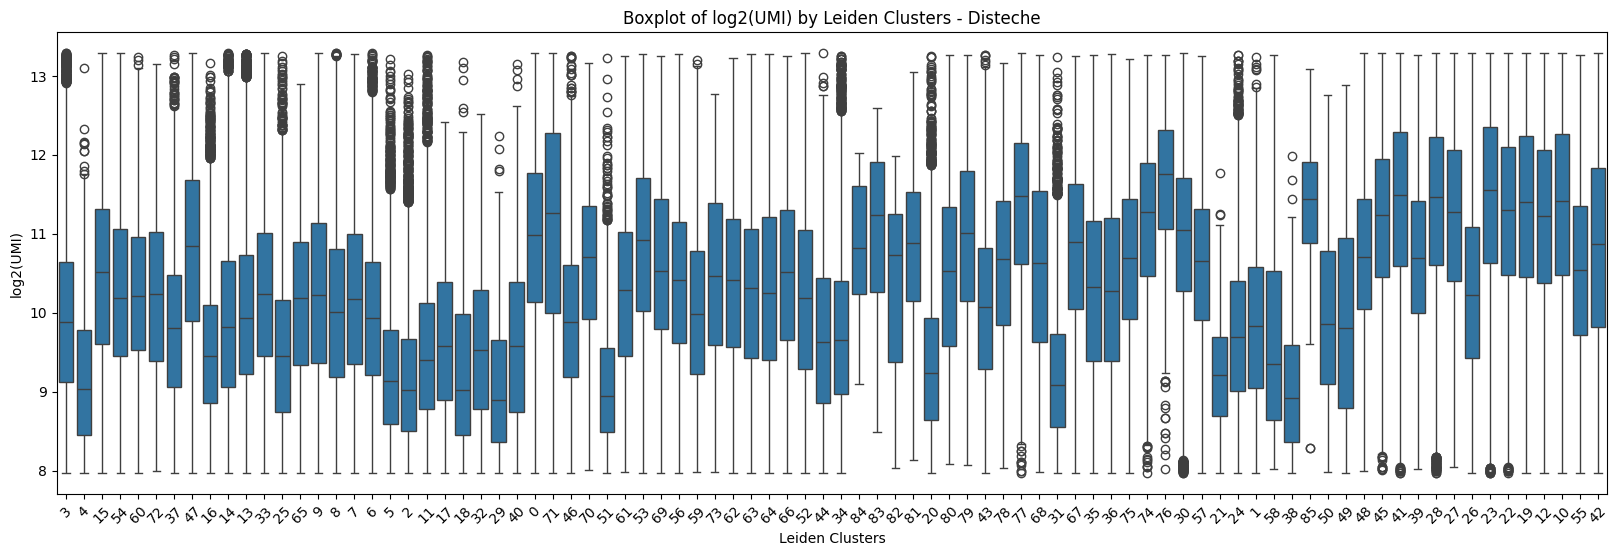

In [114]:
# Makes Log2UMI plots

# Adding log2(UMI) column
adata_dis.obs['log2_umi'] = np.log2(adata_dis.obs['n.umi'].values)

# Create a boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='leiden', y='log2_umi', data=adata_dis.obs)
plt.xlabel('Leiden Clusters')
plt.ylabel('log2(UMI)')
plt.title('Boxplot of log2(UMI) by Leiden Clusters - Disteche')
plt.xticks(rotation=45)
#plt.savefig('/net/noble/vol1/home/es1/aneuploidy/data/for_scanorama/figures/Disteche_UMI_plot.png', dpi=300)
plt.show()

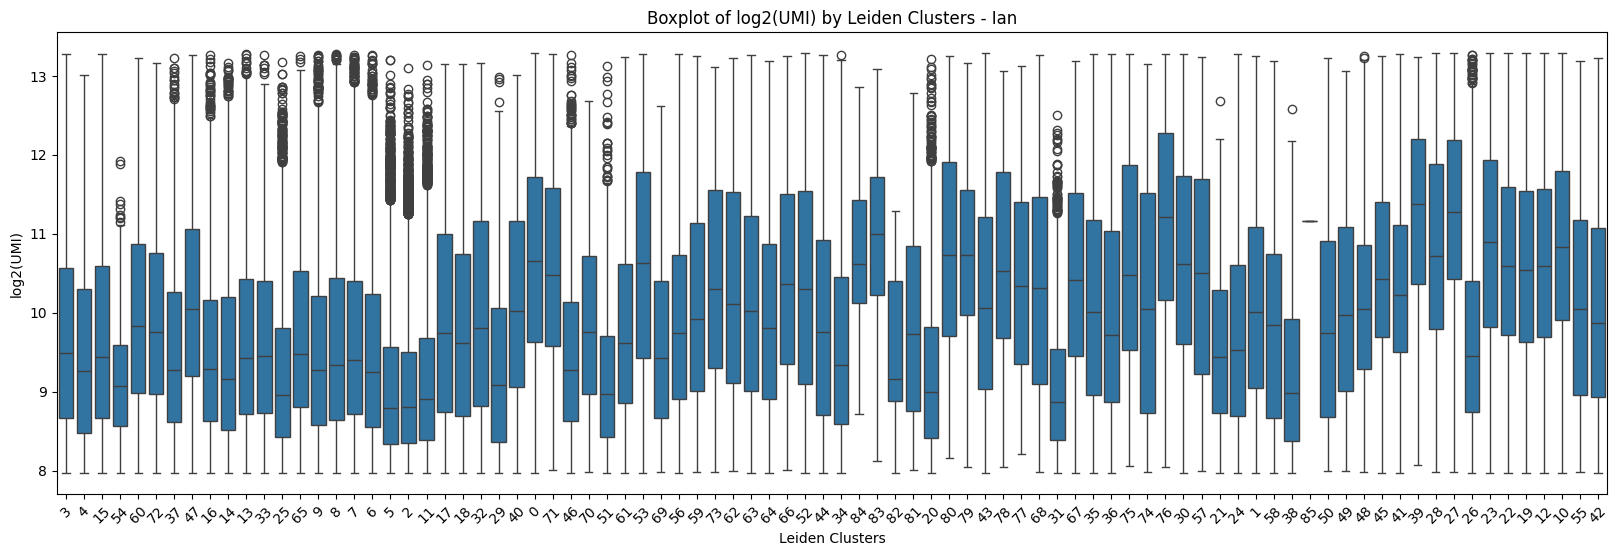

In [115]:
# Makes Log2UMI plots

# Adding log2(UMI) column
adata_ian.obs['log2_umi'] = np.log2(adata_ian.obs['n.umi'].values)

# Create a boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='leiden', y='log2_umi', data=adata_ian.obs)
plt.xlabel('Leiden Clusters')
plt.ylabel('log2(UMI)')
plt.title('Boxplot of log2(UMI) by Leiden Clusters - Ian')
plt.xticks(rotation=45)
#plt.savefig('/net/noble/vol1/home/es1/aneuploidy/data/for_scanorama/figures/Disteche_UMI_plot.png', dpi=300)
plt.show()

In [77]:
# some clusters only have Cao cells - but not Disteche or Ian

In [80]:
adata_dis.X.min()

0.0

In [116]:
# makes marker gene dotplots

# Normalizing to median total counts
sc.pp.normalize_total(adata_dis)
sc.pp.log1p(adata_dis)

sc.pp.normalize_total(adata_ian)
sc.pp.log1p(adata_ian)

sc.pp.normalize_total(adata_cao)
sc.pp.log1p(adata_cao)

In [117]:
marker_genes = {'Astrocytes': ['ALDH1L1', 'SLC1A3'], 'Excitatory neurons': ["SLC17A7", "NEUROD6", "MAB21L1"], 'Granule neurons': ['PAX6'], 'Inhibitory interneurons': ['GAD1', 'RELN', 'PAX2'], 'Inhibitory neurons': ["GAD1", "RELN", "CALB1"], 'Limbic system neurons': ['TCF7L2', 'LHX9', 'NECAB2'], 'Microglia': ['CX3CR1', 'P2RY12', 'TMEM119'], 'Oligodendrocytes': ['MOG', 'MAG', 'SOX10', 'OLIG1'], 'Purkinje neurons': ['PCP4', 'GAD1', 'GAD2', 'NECAB2'], 'SKOR2_NPSR1 positive cells': ['CALB1', 'TFAP2A'], 'SLC24A4_PEX5L positive cells': ['SLC24A4', 'PEX5L', 'L3MBTL4'], 'Unipolar brush cells': ['EOMES'], 'Vascular endothelial cells': ['CLDN5', 'SLCO1C1']}

In [90]:
adata_cao.X.max()

5.158530788832934

In [89]:
adata_dis.X.max()

4.867585504291863

c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' 

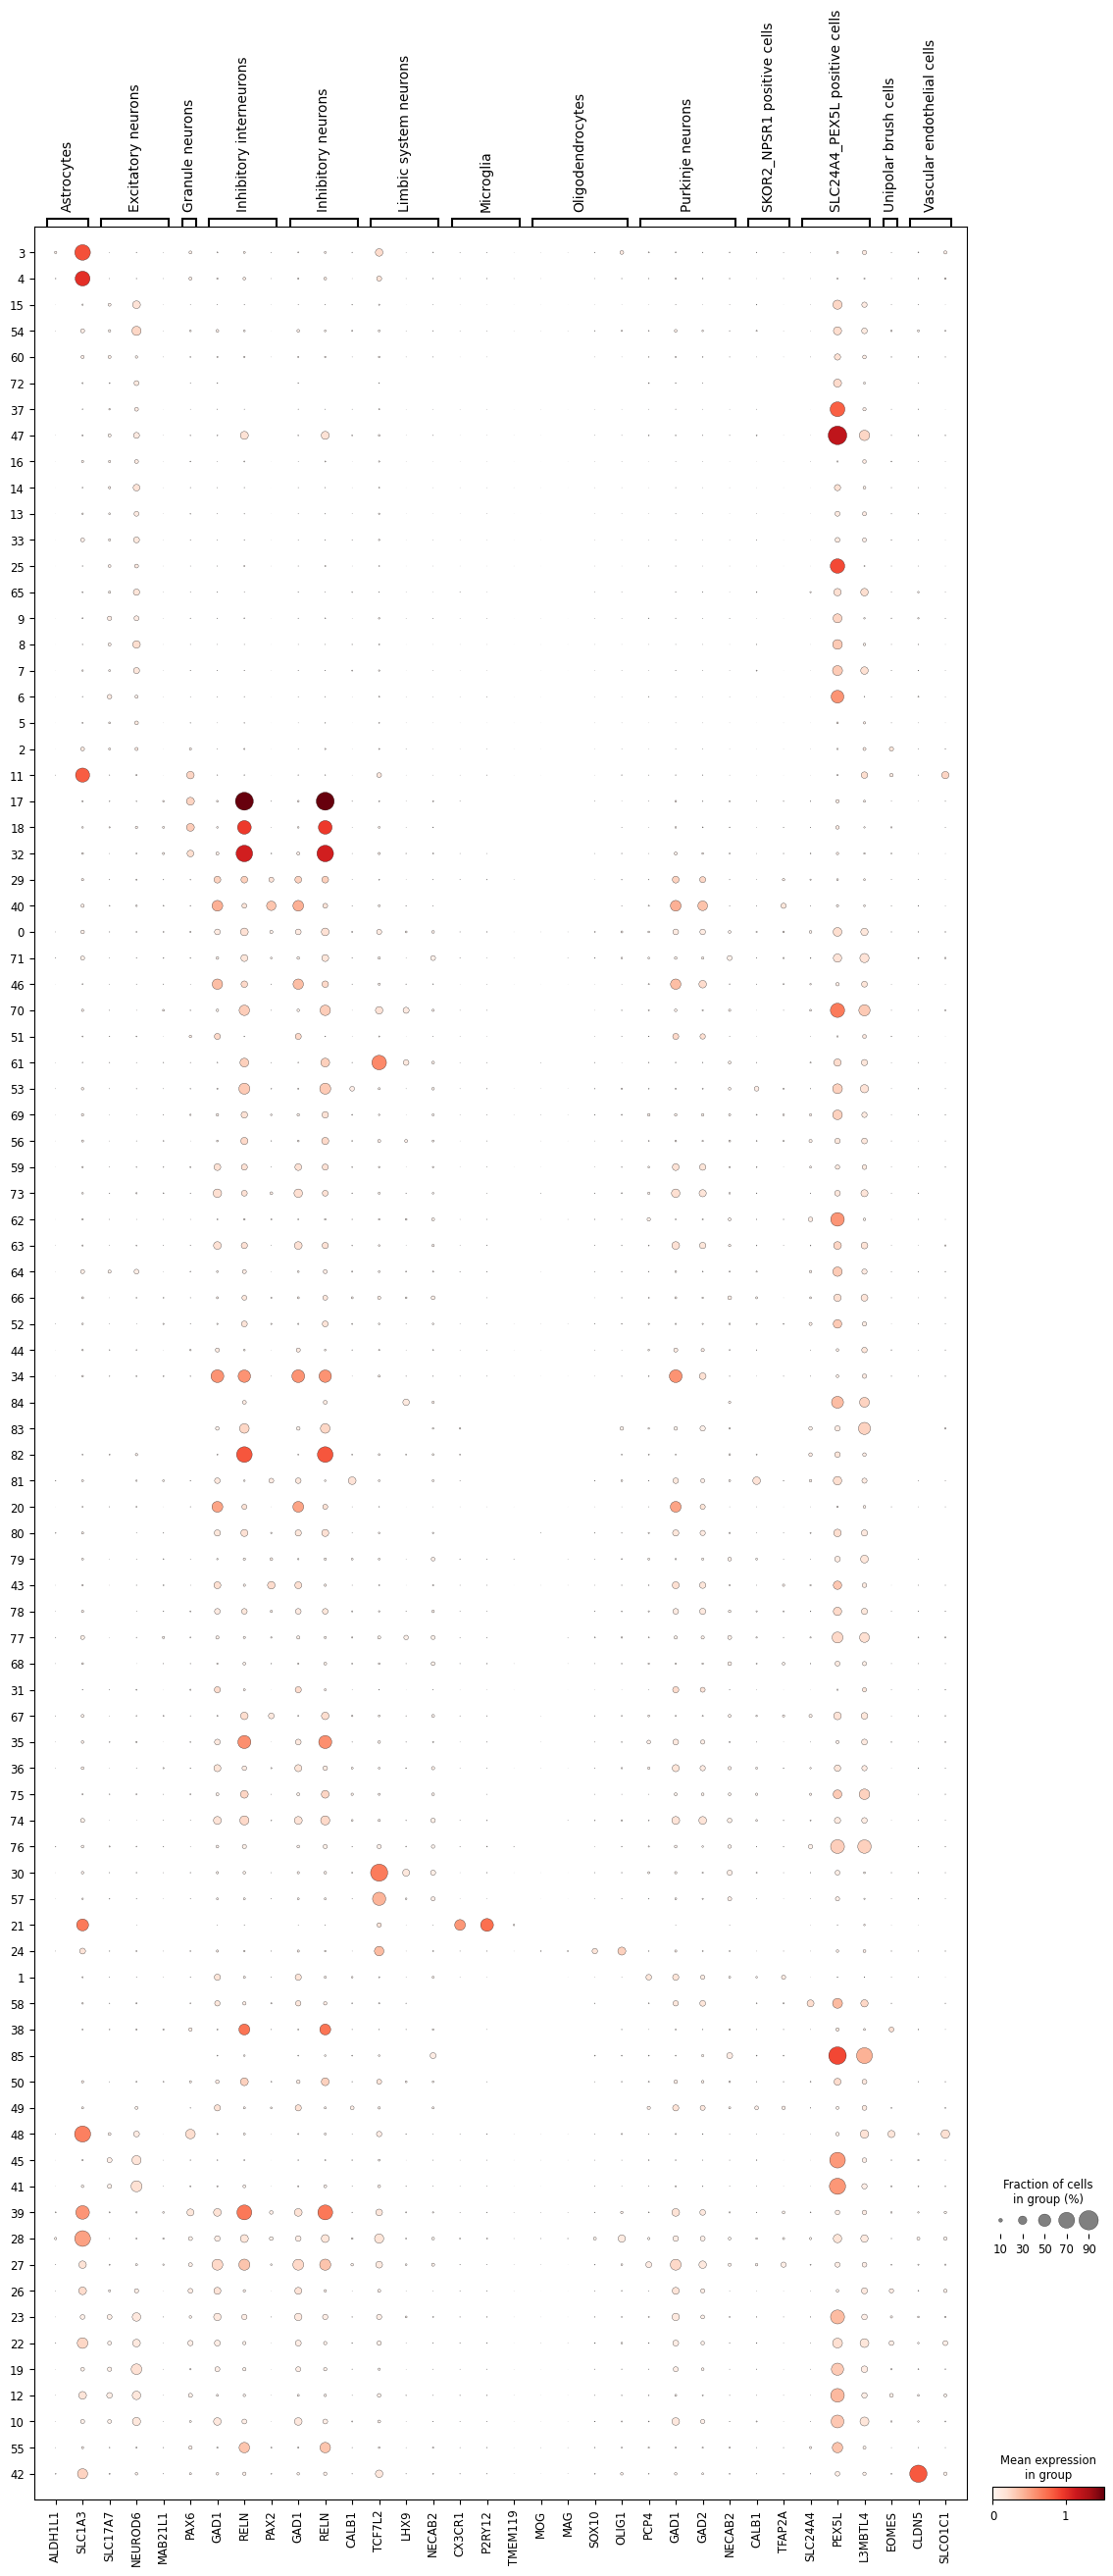

In [118]:
sc.pl.dotplot(adata_dis, marker_genes, groupby='leiden')

c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
c:\Users\Elliott\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' 

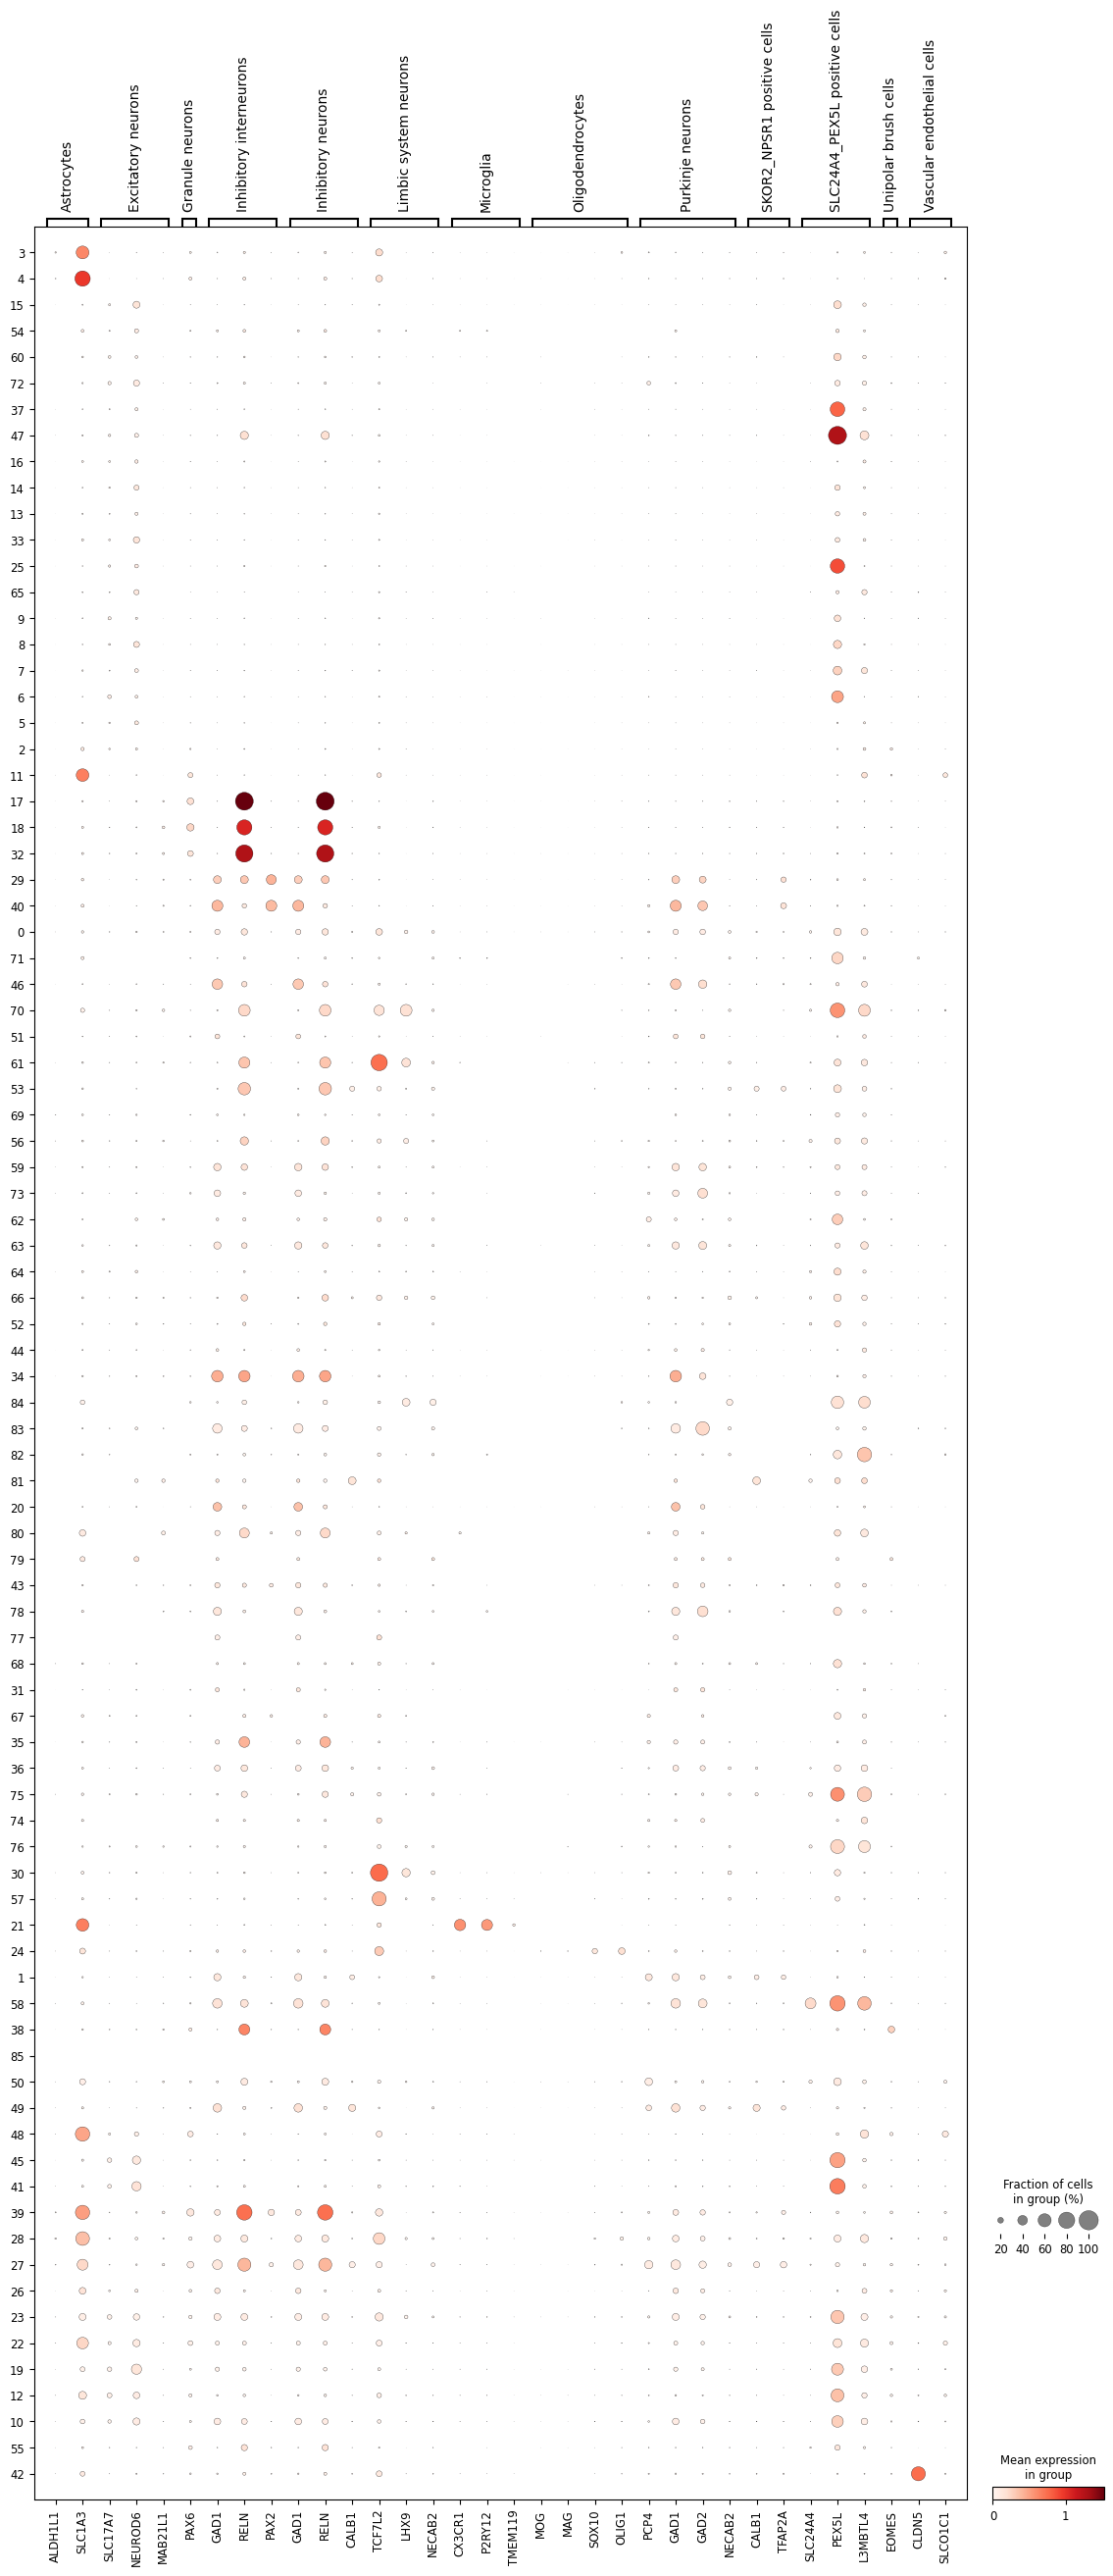

In [119]:
sc.pl.dotplot(adata_cao, marker_genes, groupby='leiden')